In [1]:
import rust_machine_learning
from syed_ml_lib import *
import os

In [2]:
# Setup the CNN
num_classifications = 10
input_height = 32
input_width = 32
input_depth = 3
CNN = rust_machine_learning.ConvolutionalNeuralNetwork(num_classifications, input_height, input_width, input_depth)

# Setup the layers

# The api has 3 functions
# add_convolutional_layer(filter_height, filter_width, num_filters)
# add_max_pool_layer()
# add_fully_connected_layer() 

# Add fully connected layer can only be called once, and must be called last
CNN.add_convolutional_layer(3, 3, 32)
# CNN.add_max_pool_layer()
# CNN.add_convolutional_layer(3, 3, 32)
# CNN.add_max_pool_layer()
CNN.add_fully_connected_layer() 

image_directory = "../data/cifar-10/"
image_directory_path = os.path.abspath(image_directory)
CNN.set_image_loader(image_directory_path, input_height, input_width)

Reading images for classification "truck"
Reading images for classification "airplane"
Reading images for classification "cat"
Reading images for classification "deer"
Reading images for classification "dog"
Reading images for classification "ship"
Reading images for classification "bird"
Reading images for classification "automobile"
Reading images for classification "frog"
Reading images for classification "horse"


In [3]:
# Grab mnist data
import random
import numpy as np

df = pd.read_csv("../data/digit-recognizer/train.csv")

# Normalize images
df.iloc[:, 1:] = df.iloc[:, 1:].div(255.0).sub(0.5)
images = df.iloc[:, 1:].values.tolist()
df.iloc[:, 0] = df.iloc[:, 0].astype(np.float32)
labels = df.iloc[:, 0].values.tolist()

# Split into training and testing
test_images = images[0:20000]
test_labels = labels[0:20000]
train_images = images[20000:]
train_labels = labels[20000:]

df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
1,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
3,4.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
4,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41996,1.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41997,7.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
41998,6.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,...,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5


In [4]:
def test_mnist():
    num_batches_to_test = 500
    num_right = 0
    for i in range(num_batches_to_test):

        # Random sample one image from python list of images
        rand_index = random.randint(0, len(test_images) - 1)
        image = test_images[rand_index]
        label = test_labels[rand_index]

        prediction = CNN.classify([[image]])[0]
        if prediction == label:
            num_right += 1

    print("Accuracy: " + str(100.0 * num_right / (num_batches_to_test)))

In [5]:
test_image_loader = rust_machine_learning.ImageBatchLoader(image_directory_path, input_width, input_height)
def test_using_image_loader():
    num_batches_to_test = 100
    num_right = 0
    for i in range(num_batches_to_test):

        images, label = test_image_loader.batch_sample(1)

        prediction = CNN.classify(images)[0]
        if prediction == label[0]:
            num_right += 1

    print("Accuracy: " + str(100.0 * num_right / (num_batches_to_test)))

Reading images for classification "truck"
Reading images for classification "airplane"
Reading images for classification "cat"
Reading images for classification "deer"
Reading images for classification "dog"
Reading images for classification "ship"
Reading images for classification "bird"
Reading images for classification "automobile"
Reading images for classification "frog"
Reading images for classification "horse"


In [6]:
def train_using_raw_data():
    learning_rate = 1e-4
    batch_size = 1
    num_iter = 3000

    print("Accuracy before training:")
    test_mnist()
    print("Training...")
    for i in range(0, num_iter):

        # Create image and label batch from mnist
        image_batch, label_batch = [], []
        for j in range(batch_size):
            rand_index = random.randint(0, len(train_images) - 1)
            image = train_images[rand_index]
            label = train_labels[rand_index]
            image_batch.append([image])
            label_batch.append(label)

        # Train using MNIST dataset, select one image at a time randomly
        CNN.train_raw_data(image_batch, label_batch, learning_rate)

    print("Accuracy after training:")
    test_mnist()

    # Get the loss and accuracy and plot it
    perfomance_info = CNN.get_performance_info() # Return a list of tuple (accuracy, loss)
    accuracy = [x[0] for x in perfomance_info]
    loss = [x[1] for x in perfomance_info]

    # Normalize the accuracy and loss
    accuracy = [x / 100.0 for x in accuracy]
    loss = [x / max(loss) for x in loss]

    # Use plotly
    import plotly
    import plotly.graph_objs as go
    plotly.offline.init_notebook_mode(connected=True)

    trace0 = go.Scatter(
        x = list(range(len(accuracy))),
        y = accuracy,
        mode = 'lines',
        name = 'accuracy'
    )
    trace1 = go.Scatter(
        x = list(range(len(loss))),
        y = loss,
        mode = 'lines',
        name = 'loss'
    )

    data = [trace0, trace1]
    plotly.offline.iplot(data, filename='basic-line')

In [17]:
def train_using_set_img_loader():
    learning_rate = 1e-5
    batch_size = 4
    num_iter = 5000
    print("Accuracy before training:")
    test_using_image_loader()
    print("Training...")
    CNN.train_using_image_loader(learning_rate, batch_size, num_iter)
    test_using_image_loader()

    # Get the loss and accuracy and plot it
    perfomance_info = CNN.get_performance_info() # Return a list of tuple (accuracy, loss)
    accuracy = [x[0] for x in perfomance_info]
    loss = [x[1] for x in perfomance_info]

    # Normalize the accuracy and loss
    accuracy = [x / 100.0 for x in accuracy]
    loss = [x / max(loss) for x in loss]

    # Use plotly
    import plotly
    import plotly.graph_objs as go
    plotly.offline.init_notebook_mode(connected=True)

    trace0 = go.Scatter(
        x = list(range(len(accuracy))),
        y = accuracy,
        mode = 'lines',
        name = 'accuracy'
    )
    trace1 = go.Scatter(
        x = list(range(len(loss))),
        y = loss,
        mode = 'lines',
        name = 'loss'
    )

    data = [trace0, trace1]
    plotly.offline.iplot(data, filename='basic-line')

In [18]:
# Now train the model
# train_using_raw_data()
train_using_set_img_loader()

Accuracy before training:
Accuracy: 39.0
Training...
Performance Info For 10000 Iteration:
Accuracy: 32
Loss: 112.88454
Performance Info For 10050 Iteration:
Accuracy: 34
Loss: 177.67651
Performance Info For 10100 Iteration:
Accuracy: 32
Loss: 212.93132
Performance Info For 10150 Iteration:
Accuracy: 39
Loss: 170.31175
Performance Info For 10200 Iteration:
Accuracy: 32
Loss: 198.20168
Performance Info For 10250 Iteration:
Accuracy: 38
Loss: 162.54732
Performance Info For 10300 Iteration:
Accuracy: 29
Loss: 196.03308
Performance Info For 10350 Iteration:
Accuracy: 42
Loss: 172.38008
Performance Info For 10400 Iteration:
Accuracy: 30
Loss: 172.05681
Performance Info For 10450 Iteration:
Accuracy: 34
Loss: 209.56708
Performance Info For 10500 Iteration:
Accuracy: 42
Loss: 183.38223
Performance Info For 10550 Iteration:
Accuracy: 34
Loss: 209.08463
Performance Info For 10600 Iteration:
Accuracy: 39
Loss: 173.45398
Performance Info For 10650 Iteration:
Accuracy: 32
Loss: 204.40842
Performan

Label: frog 8.0
Prediction: frog (8.0)



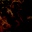

In [9]:
# Interactive testing (for now animal only)
images, label = test_image_loader.batch_sample(1)

prediction = CNN.classify(images)
prediction = prediction[0]

# Assert animal image loader and CNN are in sync
assert(test_image_loader.get_classifications_map() == CNN.get_image_loader_classification_map())

# Now reverse mapping from string->float to float->string
classification_map = {}
for key, value in test_image_loader.get_classifications_map().items():
    classification_map[value] = key

print("Label: " + classification_map[label[0]] + " " + str(label[0]))
print("Prediction: " + classification_map[prediction] + " (" + str(prediction) + ")")
view_image(np.array(images[0]), input_width, input_height, colorscale="")